In [50]:
import sys

sys.path.insert(0, '/home/caron/Bureau/Model/HexagonalScale/ST-GNN-for-wildifre-prediction/Prediction')

from config import *
from tools import *
from features import *

path_to_dfs = Path('/home/caron/Bureau/Model/HexagonalScale/ST-GNN-for-wildifre-prediction/Prediction/GNN/bdiff_small/firepoint/2x2/test/occurence_voting/departement-13-bouches-du-rhone/full_0_all_departement_0_None_node/catboost_search_one_nbsinister-kmeans-5-Class-Dept_classification_softmax')

In [51]:
res = read_object(f'catboost_search_one_nbsinister-kmeans-5-Class-Dept_classification_softmax_full_0_all_departement_0_None_node_z-score_Catboost_departement-13-bouches-du-rhone_pred.pkl', path_to_dfs)

In [52]:
firepoint = pd.read_csv('/home/caron/Bureau/csv/france/firepoint/firepoint.csv')
firepoint_2 = pd.read_csv('/home/caron/Bureau/Model/HexagonalScale/ST-GNN-for-wildifre-prediction/Prediction/GNN/sinister/bdiff/firepoint.csv')
firepoint_2 = firepoint_2[firepoint_2['Département'] == 13]
firepoint_2 = firepoint_2[(firepoint_2['date'] >= '2023-03-01') & (firepoint_2['date'] <= '2023-09-30')]
firepoint_2

/tmp/ipykernel_35257/860392466.py:2: DtypeWarning: Columns (29) have mixed types. Specify dtype option on import or set low_memory=False.
  firepoint_2 = pd.read_csv('/home/caron/Bureau/Model/HexagonalScale/ST-GNN-for-wildifre-prediction/Prediction/GNN/sinister/bdiff/firepoint.csv')


,Unnamed: 0,Année,Numéro,Département,Code INSEE,Nom de la commune,Date de première alerte,Surface parcourue (m2),Surface forêt (m2),Surface maquis garrigues (m2),...,Température (°C),Précision de la donnée,coef,latitude,longitude,date,month,h3,departement,scale0
4800,16625,2023,1299,13,13072,Peynier,2023-03-03 14:27:00,60,60.0,NaN,...,NaN,NaN,1,43.447154,5.640332,2023-03-03,3,873968aa1ffffff,departement-13-bouches-du-rhone,14819
4801,16663,2023,1300,13,13041,Gardanne,2023-03-07 13:15:00,1000,1000.0,NaN,...,NaN,NaN,1,43.455613,5.471066,2023-03-07,3,873968b90ffffff,departement-13-bouches-du-rhone,14760
4802,16699,2023,1301,13,13086,Roquevaire,2023-03-12 15:31:00,200,200.0,NaN,...,NaN,NaN,1,43.349365,5.604661,2023-03-12,3,873968a91ffffff,departement-13-bouches-du-rhone,14747
4803,16701,2023,1302,13,13082,Rognes,2023-03-12 20:04:00,50,50.0,NaN,...,NaN,NaN,1,43.663829,5.346900,2023-03-12,3,873968866ffffff,departement-13-bouches-du-rhone,14518
4804,16710,2023,1303,13,13038,Fontvieille,2023-03-14 15:49:00,300,300.0,NaN,...,NaN,NaN,1,46.313357,1.459743,2023-03-14,3,87186d732ffffff,departement-13-bouches-du-rhone,25788
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5030,18499,2023,10073,13,13084,La Roque-d'Anthéron,2023-09-08 11:46:00,400,400.0,0.0,...,NaN,NaN,1,43.715096,5.312221,2023-09-08,9,87396894effffff,departement-13-bouches-du-rhone,87396894effffff
5031,18550,2023,10074,13,13098,Saint-Mitre-les-Remparts,2023-09-12 06:03:00,100,100.0,0.0,...,NaN,NaN,1,43.452893,5.014112,2023-09-12,9,8739688b0ffffff,departement-13-bouches-du-rhone,14221
5032,18559,2023,10075,13,13019,Cabriès,2023-09-13 16:11:00,10,10.0,0.0,...,NaN,NaN,1,43.441196,5.379888,2023-09-13,9,8739688caffffff,departement-13-bouches-du-rhone,14529
5033,18616,2023,10076,13,13015,Bouc-Bel-Air,2023-09-28 14:38:00,600,600.0,0.0,...,NaN,NaN,1,43.451182,5.412785,2023-09-28,9,8739688cbffffff,departement-13-bouches-du-rhone,14791


In [53]:
date_fire = firepoint_2.date.unique()
len(date_fire)

117

In [54]:
dates = res.date.values
print(allDates[int(dates[0])], allDates[int(dates[-1])])
dates_fire_1 = res[res['nbsinister'] > 0]
dates = dates_fire_1.date.values.astype(int)
len(dates_fire_1)

2023-03-02 2023-09-30


79

In [55]:
date_missing = [allDates.index(d) for d in date_fire if allDates.index(d) not in dates_fire_1.date.values.astype(int)]
date_missing, len(date_missing)

([2101,
  2111,
  2113,
  2128,
  2134,
  2135,
  2142,
  2143,
  2152,
  2154,
  2158,
  2163,
  2166,
  2176,
  2177,
  2179,
  2188,
  2190,
  2204,
  2205,
  2206,
  2212,
  2228,
  2230,
  2232,
  2233,
  2236,
  2250,
  2253,
  2254,
  2256,
  2259,
  2265,
  2272,
  2274,
  2275,
  2279,
  2301],
 38)

In [58]:
print(res[res['date'] == 2101]['nbsinister-kmeans-5-Class-Dept'])
firepoint_2[firepoint_2['date'] == allDates[2101]]

12    0
Name: nbsinister-kmeans-5-Class-Dept, dtype: int64


,Unnamed: 0,Année,Numéro,Département,Code INSEE,Nom de la commune,Date de première alerte,Surface parcourue (m2),Surface forêt (m2),Surface maquis garrigues (m2),...,Température (°C),Précision de la donnée,coef,latitude,longitude,date,month,h3,departement,scale0
4804,16710,2023,1303,13,13038,Fontvieille,2023-03-14 15:49:00,300,300.0,NaN,...,NaN,NaN,1,46.313357,1.459743,2023-03-14,3,87186d732ffffff,departement-13-bouches-du-rhone,25788


In [60]:
df_test = read_object('df_test_full_0_all_departement_0_None_node.pkl', Path('/home/caron/Bureau/Model/HexagonalScale/ST-GNN-for-wildifre-prediction/Prediction/GNN/bdiff_small/firepoint/2x2/train/occurence_voting'))
df_test[(df_test['date'] == 2101) & (df_test['departement'] == 13)]['nbsinister']

In [67]:
df_test = read_object('df_full_departement_None_node.pkl', Path('/home/caron/Bureau/Model/HexagonalScale/ST-GNN-for-wildifre-prediction/Prediction/GNN/bdiff_small/firepoint/2x2/train/'))
df_test[(df_test['date'] == 2101) & (df_test['departement'] == 13)]['nbsinister']

1413    0.0
Name: nbsinister, dtype: float64

In [70]:
df_test = read_object('Y_full_departement_None_node.pkl', Path('/home/caron/Bureau/Model/HexagonalScale/ST-GNN-for-wildifre-prediction/Prediction/GNN/bdiff_small/firepoint/2x2/train/'))
print(df_test[0])
#df_test[( == 2101) & (df_test['departement'] == 13)]['nbsinister']
df_test[(df_test[:, departement_index] == 13) & (df_test[:, date_index] == 2101)]

[ 0.          0.          5.08255586 43.55186173 13.          0.
  1.          0.          0.          0.          0.        ]


array([[0.00000000e+00, 0.00000000e+00, 5.08255586e+00, 4.35518617e+01,
        1.30000000e+01, 2.10100000e+03, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

(34, 52, 2574)


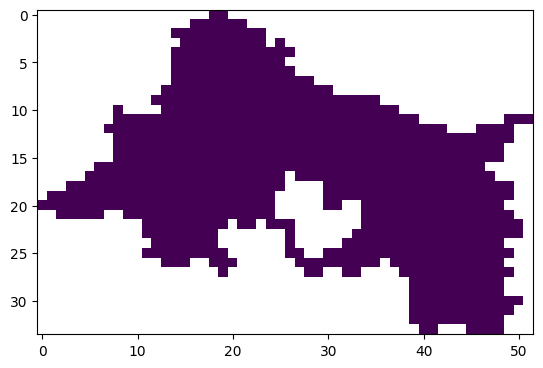

In [79]:
import matplotlib.pyplot as plt
df_test = read_object('departement-13-bouches-du-rhonebinScale0.pkl', Path('/home/caron/Bureau/Model/HexagonalScale/ST-GNN-for-wildifre-prediction/Prediction/Target/firepoint/bdiff/occurence/bin/2x2'))
print(df_test.shape)
plt.imshow(df_test[:, :, 2101])

In [ ]:
['873968074ffffff' '87396815effffff' '87396c768ffffff' '873968b08ffffff'
 '8739689b2ffffff' '87396c299ffffff' '87396880dffffff' '8739688d2ffffff'
 '87396804cffffff' '873968d2affffff' '873968a82ffffff' '87396c6f2ffffff'
 '8739689b5ffffff' '873968b11ffffff' '873968d00ffffff' '873968b93ffffff'
 '873968b94ffffff' '873968b85ffffff' '873968d6dffffff' '87396c6caffffff'
 '87396895bffffff' '873968b10ffffff' '87396c74affffff' '873968b2bffffff'
 '873968808ffffff' '873968901ffffff' '873968bacffffff' '87396c691ffffff'
 '873968843ffffff' '873968174ffffff' '87396802bffffff' '873968990ffffff'
 '87396c648ffffff' '873968981ffffff' '873968852ffffff' '873968ab0ffffff'
 '873968040ffffff' '873968b95ffffff' '8739688d0ffffff' '8739688d6ffffff'
 '87396c392ffffff' '873968d69ffffff' '87396804effffff' '873968b15ffffff'
 '87396c6deffffff' '873968d52ffffff' '873968163ffffff' '873968980ffffff'
 '87396802cffffff' '873968aa6ffffff' '87396891cffffff' '87396806effffff'
 '87396806affffff' '873968a9dffffff' '873968918ffffff' '873968983ffffff'
 '8739688d1ffffff' '873968803ffffff' '87396814bffffff' '873968aa4ffffff'
 '87396c6a1ffffff' '8739689a6ffffff' '87396c6eeffffff' '873968856ffffff'
 '873968b00ffffff' '87396890dffffff' '87396c789ffffff' '87396815affffff'
 '873968b0affffff' '873968851ffffff' '87396812dffffff' '873968819ffffff'
 '873968922ffffff' '87396c39cffffff' '87396eb41ffffff' '873968d64ffffff'
 '873968820ffffff' '873968a06ffffff' '873968bb1ffffff' '87396c2a3ffffff'
 '87396c6ecffffff' '873968b70ffffff' '873968ba4ffffff' '87396c282ffffff'
 '87396c61effffff' '87396c616ffffff' '873968806ffffff' '873968149ffffff'
 '8739688c1ffffff' '873968b96ffffff' '87396c6c8ffffff' '87396c76dffffff'
 '87396eb6cffffff' '87396890cffffff' '873968931ffffff' '873968d15ffffff'
 '87396c79effffff' '87396c635ffffff' '873968955ffffff' '873968908ffffff'
 '87396c64dffffff' '8739688f1ffffff' '87396c621ffffff' '87396c660ffffff'
 '87396c68dffffff' '87396c294ffffff' '873968919ffffff' '873968159ffffff'
 '873968ba8ffffff' '87396c603ffffff' '87396eb48ffffff' '87396eb40ffffff'
 '87396898dffffff' '87396c604ffffff' '873968125ffffff' '873968129ffffff'
 '87396c60affffff' '87396c6f1ffffff' '87396c6a0ffffff' '873968a33ffffff'
 '87396c6a9ffffff' '873968b9effffff' '87396eb44ffffff' '873968169ffffff'
 '87396c292ffffff' '873968d25ffffff' '87396c6b0ffffff' '87396c75bffffff'
 '87396c6e3ffffff' '87396880affffff' '87396eb70ffffff' '87396c61dffffff'
 '873968d02ffffff' '873968068ffffff' '873968a30ffffff' '87396c29dffffff'
 '873968141ffffff' '87396c280ffffff' '873968a15ffffff' '87396889bffffff'
 '873968142ffffff' '873968d54ffffff' '87396815bffffff' '8739688b2ffffff'
 '8739689a3ffffff' '87396c743ffffff' '87396c6e6ffffff' '87396885bffffff'
 '87396c6aaffffff' '8739689a2ffffff' '873968b13ffffff' '873968d74ffffff'
 '873968bb6ffffff' '87396c6a6ffffff' '873968b99ffffff' '873968d05ffffff'
 '873968904ffffff' '8739688acffffff' '873968bb0ffffff' '873968105ffffff'
 '873968a10ffffff' '87396c600ffffff' '873968835ffffff' '873968161ffffff'
 '873968933ffffff' '87396c6f3ffffff' '873968902ffffff' '87396c68bffffff'
 '873968813ffffff' '873968914ffffff' '873968124ffffff' '87396eb68ffffff'
 '87396881dffffff' '87396c2b6ffffff' '873968bb2ffffff' '87396c78bffffff'
 '87396882dffffff' '87396c642ffffff' '873968810ffffff' '873968805ffffff'
 '873968071ffffff' '87396c75affffff' '87396882bffffff' '873968815ffffff'
 '87396c612ffffff' '8739688b0ffffff' '87396c664ffffff' '87396c653ffffff'
 '873968aadffffff' '873968a36ffffff' '87396c6ceffffff' '873968073ffffff'
 '87396886bffffff' '87396c6f6ffffff' '8739688c6ffffff' '873968846ffffff'
 '87396c69bffffff' '873968145ffffff' '87396c759ffffff' '8739689b0ffffff'
 '87396c740ffffff' '873968b1effffff' '873968d33ffffff' '873968915ffffff'
 '87396c608ffffff' '873968b18ffffff' '87396c6c3ffffff' '873968959ffffff'
 '873968c6dffffff' '87396c66dffffff' '8739689b3ffffff' '873968896ffffff'
 '873968d63ffffff' '87396c771ffffff' '87396c60bffffff' '87396c65dffffff'
 '873968aaeffffff' '873968b0dffffff' '873968330ffffff' '873968332ffffff'
 '8739688ccffffff' '8739689a0ffffff' '873968d04ffffff' '8739688eaffffff'
 '873968045ffffff' '87396800dffffff' '873968811ffffff' '8739688c2ffffff'
 '87396c699ffffff' '873968135ffffff' '873968d75ffffff' '873968911ffffff'
 '87396c656ffffff' '873968151ffffff' '873968ba1ffffff' '87396c6aeffffff'
 '87396c2a6ffffff' '873968104ffffff' '873968909ffffff' '87396c2b5ffffff'
 '87396c62bffffff' '87396c6daffffff' '873968943ffffff' '87396c698ffffff'
 '87396eb49ffffff' '87396882effffff' '87396c763ffffff' '87396891dffffff'
 '873968986ffffff' '873968850ffffff' '87396c6a4ffffff' '8739688dbffffff'
 '87396c78cffffff' '87396c6acffffff' '8739688c0ffffff' '873968982ffffff'
 '873968d09ffffff' '87396c296ffffff' '87396c744ffffff' '87396eb6dffffff'
 '873968d06ffffff' '873968028ffffff' '87396c658ffffff' '87396c396ffffff'
 '873968c6cffffff' '87396c60cffffff' '873968a86ffffff' '873968930ffffff'
 '873968848ffffff' '8739688c8ffffff' '873968b0effffff' '87396c655ffffff'
 '8739688e1ffffff' '873968924ffffff' '87396c76affffff' '87396c764ffffff'
 '8739688e0ffffff' '87396884cffffff' '87396c295ffffff' '87396c613ffffff'
 '873968069ffffff' '873968d61ffffff' '873968b1affffff' '873968b89ffffff'
 '87396c671ffffff' '873968a90ffffff' '87396899cffffff' '873968864ffffff'
 '873968b92ffffff' '87396c669ffffff' '873968802ffffff' '87396c601ffffff'
 '873968d76ffffff' '87396c68cffffff' '873968062ffffff' '87396891affffff'
 '873968babffffff' '87396c749ffffff' '873968aa0ffffff' '873968b8dffffff'
 '87396c6e4ffffff' '873968932ffffff' '873968b82ffffff' '8739688c9ffffff'
 '87396804dffffff' '8739688cdffffff' '873968ba3ffffff' '8739688e8ffffff'
 '87396c285ffffff' '87396c674ffffff' '87396c39bffffff' '8739689aeffffff'
 '87396889affffff' '87396c76bffffff' '873968ba0ffffff' '873968b06ffffff'
 '873968921ffffff' '87396c614ffffff' '8739688d8ffffff' '87396eb6effffff'
 '87396eb69ffffff' '873968855ffffff' '8739688c3ffffff' '87396c28cffffff'
 '87396805dffffff' '87396c2b0ffffff' '87396c6c0ffffff' '873968b84ffffff'
 '87396c761ffffff' '8739689a9ffffff' '87396c762ffffff' '87396880effffff'
 '873968b83ffffff' '87396814cffffff' '873968854ffffff' '87396c6b5ffffff'
 '873968143ffffff' '87396c28affffff' '87396c746ffffff' '873968061ffffff'
 '873968d26ffffff' '873968d21ffffff' '873968b03ffffff' '873968153ffffff'
 '873968ba6ffffff' '87396895dffffff' '873968043ffffff' '87396c6c4ffffff'
 '873968a12ffffff' '873968aa2ffffff' '873968840ffffff' '873968d6cffffff'
 '87396c69dffffff' '87396c76effffff' '87396c6edffffff' '873968bb3ffffff'
 '873968d08ffffff' '873968a85ffffff' '87396881affffff' '87396c74dffffff'
 '87396c650ffffff' '873968168ffffff' '873968aa5ffffff' '873968d31ffffff'
 '87396eb4dffffff' '8739689abffffff' '87396c6d5ffffff' '8739688ddffffff'
 '87396885dffffff' '87396eb6affffff' '873968aacffffff' '873968336ffffff'
 '873968834ffffff' '87396c69cffffff' '873968122ffffff' '87396c78dffffff'
 '873968876ffffff' '87396c6d3ffffff' '873968b8cffffff' '87396c39affffff'
 '87396c62cffffff' '873968870ffffff' '873968aa8ffffff' '87396c799ffffff'
 '87396c398ffffff' '873968aa3ffffff' '873968836ffffff' '87396c2a2ffffff'
 '873968842ffffff' '873968b02ffffff' '87396c615ffffff' '87396816effffff'
 '87396c619ffffff' '87396c62effffff' '873968860ffffff' '87396c6c6ffffff'
 '8739688b6ffffff' '87396c79affffff' '873968ab5ffffff' '8739688d5ffffff'
 '87396c632ffffff' '87396814dffffff' '873968d35ffffff' '873968b76ffffff'
 '873968029ffffff' '87396c6b3ffffff' '873968128ffffff' '873968a9affffff'
 '873968bb5ffffff' '87396c6e0ffffff' '87396c75dffffff' '8739689b4ffffff'
 '87396895affffff' '87396c65cffffff' '87396c6dbffffff' '87396804affffff'
 '87396c602ffffff' '87396c643ffffff' '87396c680ffffff' '87396c62affffff'
 '873968956ffffff' '873968b1dffffff' '87396eb4cffffff' '87396c61cffffff'
 '873968ab4ffffff' '873968160ffffff' '873968984ffffff' '8739689a1ffffff'
 '87396c74cffffff' '873968d01ffffff' '873968a84ffffff' '87396c62dffffff'
 '87396895effffff' '873968862ffffff' '873968d30ffffff' '87396c6ebffffff'
 '87396c76cffffff' '87396892effffff' '873968992ffffff' '873968831ffffff'
 '873968165ffffff' '87396c390ffffff' '873968b8affffff' '873968126ffffff'
 '873968d45ffffff' '873968046ffffff' '873968905ffffff' '873968155ffffff'
 '873968892ffffff' '87396c29effffff' '87396c2b2ffffff' '87396c682ffffff'
 '873968b9affffff' '87396c7aaffffff' '873968d6effffff' '873968936ffffff'
 '873968d65ffffff' '8739688e3ffffff' '87396c6a8ffffff' '87396c672ffffff'
 '873968953ffffff' '87396812cffffff' '873968872ffffff' '87396c670ffffff'
 '87396c74bffffff' '873968d0cffffff' '87396880cffffff' '873968148ffffff'
 '873968060ffffff' '8739689b6ffffff' '873968946ffffff' '873968920ffffff'
 '8739688edffffff' '873968912ffffff' '873968913ffffff' '87396c695ffffff'
 '87396c645ffffff' '873968144ffffff' '87396c7abffffff' '87396c628ffffff'
 '87396899effffff' '873968134ffffff' '873968866ffffff' '873968858ffffff'
 '87396c636ffffff' '87396890bffffff' '873968a94ffffff' '87396c630ffffff'
 '8739688e9ffffff' '87396c6dcffffff' '87396c68affffff' '87396802dffffff'
 '873968b9dffffff' '8739688caffffff' '8739689a4ffffff' '873968146ffffff'
 '873968994ffffff' '873968861ffffff' '87396c6d6ffffff' '87396c676ffffff'
 '87396c283ffffff' '873968d20ffffff' '87396c66cffffff' '87396814effffff'
 '873968b12ffffff' '873968121ffffff' '87396c399ffffff' '873968845ffffff'
 '87396c663ffffff' '87396c641ffffff' '873968952ffffff' '87396c6c9ffffff'
 '8739688d3ffffff' '873968832ffffff' '873968935ffffff' '873968ba5ffffff'
 '873968a96ffffff' '87396c798ffffff' '873968ab3ffffff' '873968906ffffff'
 '873968b80ffffff' '87396c6d9ffffff' '873968334ffffff' '87396c769ffffff'
 '873968d0effffff' '87396892bffffff' '87396c66affffff' '87396806cffffff'
 '87396c755ffffff' '87396c6e8ffffff' '87396c64cffffff' '873968934ffffff'
 '873968894ffffff' '873968a83ffffff' '873968a93ffffff' '8739689a8ffffff'
 '87396eb61ffffff' '873968a16ffffff' '87396c2b1ffffff' '873968048ffffff'
 '873968809ffffff' '87396c2b3ffffff' '87396c640ffffff' '87396c6e1ffffff'
 '873968a95ffffff' '873968958ffffff' '873968075ffffff' '87396816cffffff'
 '87396c391ffffff' '873968903ffffff' '873968993ffffff' '873968950ffffff'
 '87396c685ffffff' '87396c659ffffff' '87396c290ffffff' '873968893ffffff'
 '87396c606ffffff' '873968a81ffffff' '873968c69ffffff' '873968816ffffff'
 '87396c686ffffff' '87396c6cdffffff' '8739688f5ffffff' '873968942ffffff'
 '87396c288ffffff' '873968d2bffffff' '873968823ffffff' '873968996ffffff'
 '873968bb4ffffff' '87396c6d1ffffff' '873968833ffffff' '87396885effffff'
 '8739688e6ffffff' '87396c29affffff' '87396c684ffffff' '87396c6e2ffffff'
 '87396880bffffff' '873968910ffffff' '87396c6e5ffffff' '873968804ffffff'
 '873968164ffffff' '87396c742ffffff' '87396884affffff' '87396eb62ffffff'
 '87396c752ffffff' '87396806dffffff' '873968d2effffff' '87396c609ffffff'
 '873968863ffffff' '873968b98ffffff' '87396c689ffffff' '8739688ecffffff'
 '873968170ffffff' '87396882affffff' '873968a92ffffff' '873968b9bffffff'
 '87396c741ffffff' '873968826ffffff' '87396c65bffffff' '87396c6cbffffff'
 '87396c74effffff' '873968b88ffffff' '873968d6bffffff' '873968b33ffffff'
 '873968985ffffff' '873968b36ffffff' '87396c6b1ffffff' '873968158ffffff'
 '87396816dffffff' '87396c745ffffff' '873968b8bffffff' '87396c6d8ffffff'
 '873968ab6ffffff' '87396c6e9ffffff' '87396c298ffffff' '873968d68ffffff'
 '8739689adffffff' '87396c634ffffff' '87396c60effffff' '87396c61affffff'
 '873968991ffffff' '87396c64effffff' '873968b1cffffff' '87396c284ffffff'
 '8739689aaffffff' '873968d53ffffff' '873968d72ffffff' '873968b9cffffff'
 '873968821ffffff' '87396c6c5ffffff' '87396eb6bffffff' '87396c753ffffff'
 '87396881bffffff' '873968841ffffff' '87396c29bffffff' '87396881effffff'
 '873968b0cffffff' '87396c6a3ffffff' '873968d28ffffff' '87396c6d0ffffff'
 '8739689a5ffffff' '873968d56ffffff' '87396898cffffff' '87396eb45ffffff'
 '873968868ffffff' '8739688e2ffffff' '873968829ffffff' '87396c605ffffff'
 '87396816affffff' '87396c765ffffff' '873968d0bffffff' '873968a14ffffff'
 '87396c65effffff' '873968923ffffff' '873968916ffffff' '87396c625ffffff'
 '873968b32ffffff' '87396c39effffff' '8739688c5ffffff' '873968d2dffffff'
 '87396c694ffffff' '87396c393ffffff' '873968123ffffff' '87396c7adffffff'
 '87396806bffffff' '873968d29ffffff' '87396eb63ffffff' '87396c631ffffff'
 '873968995ffffff' '873968b14ffffff' '87396c6f5ffffff' '873968801ffffff'
 '873968335ffffff' '87396c7a9ffffff' '873968ab1ffffff' '87396c75effffff'
 '87396c675ffffff' '8739688a9ffffff' '873968064ffffff' '873968822ffffff'
 '87396c652ffffff' '87396c646ffffff' '873968972ffffff' '873968044ffffff'
 '87396c2b4ffffff' '87396c291ffffff' '873968926ffffff' '873968b16ffffff'
 '873968814ffffff' '87396c286ffffff' '8739688daffffff' '87396c629ffffff'
 '87396c683ffffff' '873968d2cffffff' '873968ba9ffffff' '8739688dcffffff'
 '873968871ffffff' '873968d23ffffff' '87396c758ffffff' '873968818ffffff'
 '873968066ffffff' '873968b71ffffff' '873968a34ffffff' '873968173ffffff'
 '87396c78affffff' '87396815dffffff' '873968c68ffffff' '87396895cffffff'
 '87396c662ffffff' '87396c611ffffff' '873968873ffffff' '873968a91ffffff'
 '87396c688ffffff' '87396890affffff' '873968a9cffffff' '873968d32ffffff'
 '87396c61bffffff' '87396812effffff' '8739688d9ffffff' '873968065ffffff'
 '87396c68effffff' '873968baaffffff' '87396eb71ffffff' '8739689b1ffffff'
 '873968b90ffffff' '87396816bffffff' '873968072ffffff' '873968900ffffff'
 '873968a31ffffff' '873968b86ffffff' '87396c66bffffff' '87396c6b4ffffff'
 '87396c748ffffff' '873968ba2ffffff' '87396804bffffff' '87396814affffff'
 '87396c6d4ffffff' '87396884bffffff' '8739688a8ffffff' '873968d22ffffff'
 '873968988ffffff' '87396c6d2ffffff' '87396881cffffff' '87396c666ffffff'
 '87396882cffffff' '87396c281ffffff' '87396c760ffffff' '87396c756ffffff'
 '873968162ffffff' '873968a98ffffff' '873968175ffffff' '87396c60dffffff'
 '873968d03ffffff' '87396891effffff' '87396c6ccffffff' '8739688cbffffff'
 '873968875ffffff' '87396c651ffffff' '873968954ffffff' '87396c681ffffff'
 '873968d60ffffff' '87396886affffff' '873968973ffffff' '8739688eeffffff'
 '87396892affffff' '87396c633ffffff' '87396894affffff' '87396885affffff'
 '87396884dffffff' '873968a32ffffff' '873968063ffffff' '87396c6c1ffffff'
 '87396c64affffff' '873968b19ffffff' '873968070ffffff' '873968a80ffffff'
 '87396885cffffff' '873968041ffffff' '873968825ffffff' '873968badffffff'
 '87396c788ffffff' '873968b81ffffff' '87396c668ffffff' '873968aa1ffffff'
 '87396c751ffffff' '87396891bffffff' '87396c75cffffff' '87396c6abffffff'
 '873968849ffffff' '87396c649ffffff' '87396c6c2ffffff' '87396884effffff'
 '873968844ffffff' '87396c6a5ffffff' '87396c673ffffff' '8739688ceffffff'
 '8739688e4ffffff' '873968b91ffffff' '873968076ffffff' '873968331ffffff'
 '873968aa9ffffff' '87396c6ddffffff' '87396c750ffffff' '87396c6a2ffffff'
 '87396c6adffffff' '87396c79bffffff' '87396886effffff' '8739688c4ffffff'
 '87396eb46ffffff' '873968d66ffffff' '87396c6b6ffffff' '873968800ffffff'
 '87396c28effffff' '87396c29cffffff' '87396c654ffffff' '873968a9effffff'
 '87396c293ffffff' '873968828ffffff' '87396815cffffff' '873968120ffffff'
 '8739688adffffff' '873968830ffffff' '87396c644ffffff' '873968951ffffff'
 '873968171ffffff' '87396eb4effffff' '873968166ffffff' '873968ab2ffffff'
 '87396c665ffffff' '873968baeffffff' '87396c66effffff' '873968874ffffff'
 '8739688e5ffffff' '873968b01ffffff' '87396c6eaffffff' '8739688ebffffff'
 '873968853ffffff' '87396c6f0ffffff' '87396c6b2ffffff' '873968049ffffff'
 '873968824ffffff' '873968140ffffff' '87396c64bffffff' '873968b8effffff'
 '873968d24ffffff' '8739688f3ffffff' '873968d0dffffff' '873968989ffffff'
 '87396c65affffff' '873968859ffffff' '87396890effffff' '87396802affffff'
 '87396c6f4ffffff' '873968a13ffffff' '8739689acffffff' '8739688deffffff'
 '87396c618ffffff' '87396c661ffffff' '87396c610ffffff']

['873968169ffffff' '873968a82ffffff' '873968989ffffff' '87396804bffffff'
 '873968126ffffff' '87396c666ffffff' '873968876ffffff' '873968d6affffff'
 '873968b9bffffff' nan '87396816dffffff' '8739688b0ffffff'
 '8739688cbffffff' '87396814effffff' '873968b84ffffff' '87396c641ffffff'
 '873968b82ffffff' '87396881cffffff' '873963845ffffff' '8739688deffffff'
 '87396882dffffff' '87186d732ffffff' '873968028ffffff' '8739689aaffffff'
 '8739689a9ffffff' '87396c764ffffff' '873968901ffffff' '873968c61ffffff'
 '8739688f0ffffff' '873968b90ffffff' '873968aacffffff' '873968b8bffffff'
 '87396880affffff' '87396c399ffffff' '87396805bffffff' '873968a91ffffff'
 '873968851ffffff' '873968061ffffff' '8739688e6ffffff' '87396892effffff'
 '87396c749ffffff' '873968042ffffff' '873968822ffffff' '873968136ffffff'
 '87396342affffff' '87396c770ffffff' '8739688abffffff' '873968104ffffff'
 '873968041ffffff' '873968121ffffff' '8739688f3ffffff' '873968166ffffff'
 '873968833ffffff' '873968b8cffffff' '873968b33ffffff' '873968b8effffff'
 '873968b92ffffff' '87396884bffffff' '873968ab1ffffff' '87396812effffff'
 '873968861ffffff' '873968130ffffff' '8739688e5ffffff' '873968925ffffff'
 '87396894effffff' '8739688caffffff' '873968906ffffff' '87396c298ffffff']
[123 10 847 734 443 743 376 '873968d6affffff' 595 nan 608 185 755 503 327
 509 302 742 '873963845ffffff' 855 176 '87186d732ffffff' 261 624 329 275
 25 '873968c61ffffff' '8739688f0ffffff' 724 370 610 129 506
 '87396805bffffff' 711 69 339 572 437 297 '873968042ffffff' 679
 '873968136ffffff' '87396342affffff' '87396c770ffffff' '8739688abffffff'
 237 777 505 845 826 570 378 603 843 288 737 674 717 497 '873968130ffffff'
 832 '873968925ffffff' '87396894effffff' 493 519 614]
